<h1>Thu thấp các nước đi<h1>

In [4]:
import tkinter as tk
import pandas as pd
import random
import time

class CaroGame:
    def __init__(self, root):
        self.root = root
        self.root.title("Caro Game - Thu Thập Dữ Liệu")

        self.board_size = None
        self.win_condition = None
        self.moves = []
        self.current_player = 1
        self.board = None
        self.game_over = False

        # Menu chọn kích thước bàn cờ
        self.menu_frame = tk.Frame(root)
        self.menu_frame.pack()

        tk.Label(self.menu_frame, text="Chọn kích thước bàn cờ:").pack()
        tk.Button(self.menu_frame, text="20x20 (5 quân thắng)", command=lambda: self.start_game(20, 5)).pack()
        tk.Button(self.menu_frame, text="5x5 (3 quân thắng)", command=lambda: self.start_game(5, 3)).pack()

    def start_game(self, size, win_condition):
        """Khởi động game với kích thước và điều kiện thắng tương ứng"""
        self.board_size = size
        self.win_condition = win_condition
        self.moves = []
        self.current_player = 1
        self.board = [[0] * size for _ in range(size)]
        self.game_over = False

        # Xóa menu chọn kích thước
        for widget in self.menu_frame.winfo_children():
            widget.destroy()
        self.menu_frame.pack_forget()

        # Tạo giao diện bàn cờ
        self.canvas = tk.Canvas(self.root, width=size * 40, height=size * 40, bg="white")
        self.canvas.pack()
        self.draw_board()

        # Tạo nút Dừng
        self.stop_button = tk.Button(self.root, text="Dừng", command=self.stop_game)
        self.stop_button.pack()

        # Bắt đầu quá trình tự động cho 2 bot
        self.play_bot_game()

    def draw_board(self):
        """Vẽ bàn cờ"""
        for i in range(self.board_size):
            for j in range(self.board_size):
                x1, y1 = j * 40, i * 40
                x2, y2 = x1 + 40, y1 + 40
                self.canvas.create_rectangle(x1, y1, x2, y2, outline="black")

    def play_bot_game(self):
        """Chạy game tự động cho 2 bot"""
        while not self.game_over:
            if self.current_player == 1:
                self.bot_move_model_1(self.current_player)
            else:
                self.bot_move_model_2(self.current_player)
            time.sleep(0.5)  # Thêm thời gian để người dùng có thể thấy động tác của bot

        # Sau khi một trận đấu kết thúc, bắt đầu trận tiếp theo
        if not self.game_over:
            self.reset_game()
            self.start_game(self.board_size, self.win_condition)

    def bot_move_model_1(self, player):
        """Bot Model 1 - Chọn nước đi ngẫu nhiên"""
        available_moves = [(r, c) for r in range(self.board_size) for c in range(self.board_size) if self.board[r][c] == 0]
        if not available_moves:
            return

        # Chọn nước đi ngẫu nhiên từ danh sách các ô trống
        move = random.choice(available_moves)
        row, col = move

        self.board[row][col] = player
        self.moves.append([len(self.moves) + 1, player, row, col])

        # Vẽ quân cờ
        symbol = "X" if player == 1 else "O"
        self.canvas.create_text(col * 40 + 20, row * 40 + 20, text=symbol, font=("Arial", 24), fill="black")

        # Kiểm tra thắng
        if self.check_win(row, col):
            self.save_moves(winner=player)
            self.show_winner(player)
            self.game_over = True
            return

        # Kiểm tra hòa (hết bàn cờ)
        if len(self.moves) == self.board_size * self.board_size:
            self.save_moves(winner=0)
            self.show_draw()
            self.game_over = True
            return

        # Chuyển lượt chơi
        self.current_player = 3 - self.current_player  

    def bot_move_model_2(self, player):
        """Bot Model 2 - Sử dụng thuật toán Minimax"""
        best_move = self.minimax(player)
        row, col = best_move

        self.board[row][col] = player
        self.moves.append([len(self.moves) + 1, player, row, col])

        # Vẽ quân cờ
        symbol = "X" if player == 1 else "O"
        self.canvas.create_text(col * 40 + 20, row * 40 + 20, text=symbol, font=("Arial", 24), fill="black")

        # Kiểm tra thắng
        if self.check_win(row, col):
            self.save_moves(winner=player)
            self.show_winner(player)
            self.game_over = True
            return

        # Kiểm tra hòa (hết bàn cờ)
        if len(self.moves) == self.board_size * self.board_size:
            self.save_moves(winner=0)
            self.show_draw()
            self.game_over = True
            return

        # Chuyển lượt chơi
        self.current_player = 3 - self.current_player  

    def minimax(self, player):
        """Thuật toán Minimax để chọn nước đi tốt nhất cho bot"""
        best_score = -float('inf') if player == 1 else float('inf')
        best_move = None

        for row in range(self.board_size):
            for col in range(self.board_size):
                if self.board[row][col] == 0:
                    self.board[row][col] = player
                    score = self.minimax_score(player)
                    self.board[row][col] = 0

                    if player == 1 and score > best_score:
                        best_score = score
                        best_move = (row, col)
                    elif player == 2 and score < best_score:
                        best_score = score
                        best_move = (row, col)

        return best_move

    def minimax_score(self, player):
        """Đánh giá điểm của một nước đi"""
        if self.check_win(0, 0):
            return 1 if player == 1 else -1
        return 0

    def check_win(self, row, col):
        """Kiểm tra xem người chơi hiện tại có thắng không"""
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for dx, dy in directions:
            count = 1
            for i in range(1, self.win_condition):
                r, c = row + i * dx, col + i * dy
                if 0 <= r < self.board_size and 0 <= c < self.board_size and self.board[r][c] == self.current_player:
                    count += 1
                else:
                    break

            for i in range(1, self.win_condition):
                r, c = row - i * dx, col - i * dy
                if 0 <= r < self.board_size and 0 <= c < self.board_size and self.board[r][c] == self.current_player:
                    count += 1
                else:
                    break

            if count >= self.win_condition:
                return True
        return False

    def show_winner(self, winner):
        """Hiển thị thông báo khi có người thắng"""
        winner_text = f"Người chơi {winner} thắng!"
        self.canvas.create_text(self.board_size * 20, self.board_size * 20, text=winner_text, font=("Arial", 24), fill="blue")
        self.root.after(2000, self.reset_game)  # Quay lại màn hình chọn bàn cờ sau 2 giây

    def show_draw(self):
        """Hiển thị thông báo khi hòa"""
        draw_text = "Hòa!"
        self.canvas.create_text(self.board_size * 20, self.board_size * 20, text=draw_text, font=("Arial", 24), fill="blue")
        self.root.after(2000, self.reset_game)  # Quay lại màn hình chọn bàn cờ sau 2 giây

    def save_moves(self, winner=None):
        """Lưu dữ liệu vào dataset tương ứng với kích thước bàn cờ"""
        file_path = "caro_20x20.csv" if self.board_size == 20 else "caro_5x5.csv"

        df = pd.DataFrame(self.moves, columns=["Lượt", "Người chơi", "Hàng", "Cột"])
        df["Người thắng"] = winner if winner else None
        df.to_csv(file_path, mode="a", header=False, index=False)

    def stop_game(self):
        """Dừng game và quay lại màn hình chọn kích thước bàn cờ"""
        self.canvas.delete("all")
        self.stop_button.destroy()
        self.menu_frame.pack()

    def reset_game(self):
        """Khởi động lại trò chơi"""
        self.canvas.delete("all")
        self.moves = []
        self.game_over = False
        self.current_player = 1
        self.board = [[0] * self.board_size for _ in range(self.board_size)]
        self.play_bot_game()


# Main loop
root = tk.Tk()
game = CaroGame(root)
root.mainloop()


In [ ]:
import tkinter as tk
import pandas as pd
import random
import time

class CaroGame:
    def __init__(self, root):
        self.root = root
        self.root.title("Caro Game - Thu Thập Dữ Liệu")

        self.board_size = None
        self.win_condition = None
        self.moves = []
        self.current_player = 1
        self.board = None
        self.game_over = False
        self.playing = False  # Biến điều khiển trò chơi liên tục hay không

        # Menu chọn kích thước bàn cờ
        self.menu_frame = tk.Frame(root)
        self.menu_frame.pack()

        tk.Label(self.menu_frame, text="Chọn kích thước bàn cờ:").pack()
        tk.Button(self.menu_frame, text="20x20 (5 quân thắng)", command=lambda: self.start_game(20, 5)).pack()
        tk.Button(self.menu_frame, text="5x5 (3 quân thắng)", command=lambda: self.start_game(5, 3)).pack()
        tk.Button(self.menu_frame, text="Thoát", command=self.quit_game).pack()

    def start_game(self, size, win_condition):
        """Khởi động game với kích thước và điều kiện thắng tương ứng"""
        self.board_size = size
        self.win_condition = win_condition
        self.moves = []
        self.current_player = 1
        self.board = [[0] * size for _ in range(size)]
        self.game_over = False
        self.playing = True  # Đánh dấu trò chơi đang chơi

        # Xóa menu chọn kích thước
        for widget in self.menu_frame.winfo_children():
            widget.destroy()
        self.menu_frame.pack_forget()

        # Tạo giao diện bàn cờ
        self.canvas = tk.Canvas(self.root, width=size * 40, height=size * 40, bg="white")
        self.canvas.pack()
        self.draw_board()

        # Tạo nút Dừng
        self.stop_button = tk.Button(self.root, text="Dừng", command=self.stop_game)
        self.stop_button.pack()

        # Bắt đầu quá trình tự động cho 2 bot
        self.play_bot_game()

    def draw_board(self):
        """Vẽ bàn cờ"""
        for i in range(self.board_size):
            for j in range(self.board_size):
                x1, y1 = j * 40, i * 40
                x2, y2 = x1 + 40, y1 + 40
                self.canvas.create_rectangle(x1, y1, x2, y2, outline="black")

    def play_bot_game(self):
        """Chạy game tự động cho 2 bot"""
        while self.playing and not self.game_over:
            if self.current_player == 1:
                self.bot_move_model_1(self.current_player)
            else:
                self.bot_move_model_2(self.current_player)
            time.sleep(0.5)  # Thêm thời gian để người dùng có thể thấy động tác của bot

        # Sau khi một trận đấu kết thúc, bắt đầu trận tiếp theo nếu trò chơi vẫn đang chơi
        if self.playing and not self.game_over:
            self.reset_game()
            self.start_game(self.board_size, self.win_condition)

    def bot_move_model_1(self, player):
        """Bot Model 1 - Chọn nước đi ngẫu nhiên"""
        available_moves = [(r, c) for r in range(self.board_size) for c in range(self.board_size) if self.board[r][c] == 0]
        if not available_moves:
            return

        # Chọn nước đi ngẫu nhiên từ danh sách các ô trống
        move = random.choice(available_moves)
        row, col = move

        self.board[row][col] = player
        self.moves.append([len(self.moves) + 1, player, row, col])

        # Vẽ quân cờ
        symbol = "X" if player == 1 else "O"
        self.canvas.create_text(col * 40 + 20, row * 40 + 20, text=symbol, font=("Arial", 24), fill="black")

        # Kiểm tra thắng
        if self.check_win(row, col):
            self.save_moves(winner=player)
            self.show_winner(player)
            self.game_over = True
            return

        # Kiểm tra hòa (hết bàn cờ)
        if len(self.moves) == self.board_size * self.board_size:
            self.save_moves(winner=0)
            self.show_draw()
            self.game_over = True
            return

        # Chuyển lượt chơi
        self.current_player = 3 - self.current_player  

    def bot_move_model_2(self, player):
        """Bot Model 2 - Sử dụng thuật toán Minimax"""
        best_move = self.minimax(player)
        row, col = best_move

        self.board[row][col] = player
        self.moves.append([len(self.moves) + 1, player, row, col])

        # Vẽ quân cờ
        symbol = "X" if player == 1 else "O"
        self.canvas.create_text(col * 40 + 20, row * 40 + 20, text=symbol, font=("Arial", 24), fill="black")

        # Kiểm tra thắng
        if self.check_win(row, col):
            self.save_moves(winner=player)
            self.show_winner(player)
            self.game_over = True
            return

        # Kiểm tra hòa (hết bàn cờ)
        if len(self.moves) == self.board_size * self.board_size:
            self.save_moves(winner=0)
            self.show_draw()
            self.game_over = True
            return

        # Chuyển lượt chơi
        self.current_player = 3 - self.current_player  

    def minimax(self, player):
        """Thuật toán Minimax để chọn nước đi tốt nhất cho bot"""
        best_score = -float('inf') if player == 1 else float('inf')
        best_move = None

        for row in range(self.board_size):
            for col in range(self.board_size):
                if self.board[row][col] == 0:
                    self.board[row][col] = player
                    score = self.minimax_score(player)
                    self.board[row][col] = 0

                    if player == 1 and score > best_score:
                        best_score = score
                        best_move = (row, col)
                    elif player == 2 and score < best_score:
                        best_score = score
                        best_move = (row, col)

        return best_move

    def minimax_score(self, player):
        """Đánh giá điểm của một nước đi"""
        if self.check_win(0, 0):
            return 1 if player == 1 else -1
        return 0

    def check_win(self, row, col):
        """Kiểm tra xem người chơi hiện tại có thắng không"""
        directions = [(1, 0), (0, 1), (1, 1), (1, -1)]
        for dx, dy in directions:
            count = 1
            for i in range(1, self.win_condition):
                r, c = row + i * dx, col + i * dy
                if 0 <= r < self.board_size and 0 <= c < self.board_size and self.board[r][c] == self.current_player:
                    count += 1
                else:
                    break

            for i in range(1, self.win_condition):
                r, c = row - i * dx, col - i * dy
                if 0 <= r < self.board_size and 0 <= c < self.board_size and self.board[r][c] == self.current_player:
                    count += 1
                else:
                    break

            if count >= self.win_condition:
                return True
        return False

    def show_winner(self, winner):
        """Hiển thị thông báo khi có người thắng"""
        winner_text = f"Người chơi {winner} thắng!"
        self.canvas.create_text(self.board_size * 20, self.board_size * 20, text=winner_text, font=("Arial", 24), fill="blue")
        self.root.after(2000, self.reset_game)  # Quay lại màn hình chọn bàn cờ sau 2 giây

    def show_draw(self):
        """Hiển thị thông báo khi hòa"""
        draw_text = "Hòa!"
        self.canvas.create_text(self.board_size * 20, self.board_size * 20, text=draw_text, font=("Arial", 24), fill="blue")
        self.root.after(2000, self.reset_game)  # Quay lại màn hình chọn bàn cờ sau 2 giây

    def save_moves(self, winner=None):
        """Lưu dữ liệu vào dataset tương ứng với kích thước bàn cờ"""
        file_path = "caro_20x20.csv" if self.board_size == 20 else "caro_5x5.csv"

        df = pd.DataFrame(self.moves, columns=["Lượt", "Người chơi", "Hàng", "Cột"])
        df["Người thắng"] = winner if winner else None
        df.to_csv(file_path, mode="a", header=False, index=False)

    def stop_game(self):
        """Dừng game và quay lại màn hình chọn kích thước bàn cờ"""
        self.playing = False
        self.canvas.delete("all")
        self.stop_button.destroy()
        self.menu_frame.pack()

    def quit_game(self):
        """Thoát trò chơi"""
        self.root.quit()

    def reset_game(self):
        """Khởi động lại trò chơi"""
        """Quay lại màn hình chọn bàn cờ"""
        for widget in self.root.winfo_children():
            widget.destroy()
        self.__init__(self.root)


# Main loop
root = tk.Tk()
game = CaroGame(root)
root.mainloop()


: 

<h1>Tạo data các quần cờ<h1>

In [ ]:
import cv2
import numpy as np
import random
import os

# Hàm xoay ảnh
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

# Hàm thay đổi độ sáng
def adjust_brightness(image, factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)
    bright_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return bright_image

# Hàm thay đổi độ tương phản
def adjust_contrast(image, factor):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab[:, :, 0] = np.clip(lab[:, :, 0] * factor, 0, 255)
    contrast_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return contrast_image

# Hàm thêm nhiễu
def add_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.uint8(np.clip(image + gauss, 0, 255))
    return noisy_image

# Hàm phản chiếu ảnh (flip)
def flip_image(image):
    flip_code = random.choice([-1, 0, 1])
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

# Tạo quân cờ X
def create_X_image(size=100):
    img = np.ones((size, size, 3), dtype=np.uint8) * 255
    cv2.line(img, (10, 10), (size-10, size-10), (0, 0, 0), 2)
    cv2.line(img, (size-10, 10), (10, size-10), (0, 0, 0), 2)
    return img

# Tạo quân cờ O
def create_O_image(size=100):
    img = np.ones((size, size, 3), dtype=np.uint8) * 255
    cv2.circle(img, (size//2, size//2), size//3, (0, 0, 0), 2)
    return img

# Tạo ô trống
def create_empty_image(size=100):
    img = np.ones((size, size, 3), dtype=np.uint8) * 255
    return img

# Tạo bộ dữ liệu tăng cường cho các quân cờ X, O và ô trống
def create_augmented_data(image, label, num_variations=10):
    augmented_images = []
    for _ in range(num_variations):
        # Xoay ảnh
        angle = random.randint(0, 360)
        rotated = rotate_image(image, angle)
        augmented_images.append((rotated, label))

        # Thay đổi độ sáng
        brightness_factor = random.uniform(0.5, 1.5)
        bright = adjust_brightness(image, brightness_factor)
        augmented_images.append((bright, label))

        # Thay đổi độ tương phản
        contrast_factor = random.uniform(0.5, 1.5)
        contrast = adjust_contrast(image, contrast_factor)
        augmented_images.append((contrast, label))

        # Thêm nhiễu
        noisy = add_noise(image)
        augmented_images.append((noisy, label))

        # Phản chiếu ảnh
        flipped = flip_image(image)
        augmented_images.append((flipped, label))

    return augmented_images

# Tạo thư mục để lưu ảnh
def create_folders():
    folders = ["X_images", "O_images", "empty_images"]
    for folder in folders:
        if not os.path.exists(folder):
            os.makedirs(folder)

# Lưu ảnh vào các thư mục tương ứng
def save_images(augmented_data, label):
    for i, (augmented_img, _) in enumerate(augmented_data):
        file_name = f"{label}_{i}.png"
        path = os.path.join(f"{label}_images", file_name)
        cv2.imwrite(path, augmented_img)

# Tạo và lưu bộ dữ liệu
def create_and_save_dataset():
    create_folders()

    # Tạo bộ dữ liệu cho quân cờ X, O và ô trống
    X_image = create_X_image()
    O_image = create_O_image()
    empty_image = create_empty_image()

    # Tạo bộ dữ liệu tăng cường cho từng loại
    X_augmented = create_augmented_data(X_image, 'X')
    O_augmented = create_augmented_data(O_image, 'O')
    empty_augmented = create_augmented_data(empty_image, 'empty')

    # Lưu các ảnh vào thư mục
    save_images(X_augmented, 'X')
    save_images(O_augmented, 'O')
    save_images(empty_augmented, 'empty')

    print("Bộ dữ liệu đã được tạo và lưu thành công!")

# Tạo và lưu bộ dữ liệu
create_and_save_dataset()


<h1>Tạo data các bàn cờ<h1>

In [4]:
import cv2
import numpy as np
import random
import os

# Hàm xoay ảnh
# def rotate_image(image, angle):

#     rows, cols, _ = image.shape
#     M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
#     rotated_image = cv2.warpAffine(image, M, (cols, rows))
#     return rotated_image

import cv2
import numpy as np

# Hàm xoay ảnh không mất dữ liệu
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    
    # Tính toán điểm giữa của ảnh
    center = (cols / 2, rows / 2)
    
    # Lấy ma trận xoay
    M = cv2.getRotationMatrix2D(center, angle, 1)
    
    # Tính toán kích thước ảnh mới sao cho chứa toàn bộ hình ảnh sau khi xoay
    abs_cos = abs(M[0, 0])
    abs_sin = abs(M[0, 1])
    
    # Tính kích thước mới của ảnh
    new_cols = int(rows * abs_sin + cols * abs_cos)
    new_rows = int(rows * abs_cos + cols * abs_sin)
    
    # Cập nhật ma trận xoay để chuyển về vị trí mới
    M[0, 2] += (new_cols / 2) - center[0]
    M[1, 2] += (new_rows / 2) - center[1]
    
    # Áp dụng xoay với kích thước mới
    rotated_image = cv2.warpAffine(image, M, (new_cols, new_rows))
    
    return rotated_image


# Hàm thay đổi độ sáng
def adjust_brightness(image, factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)
    bright_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return bright_image

# Hàm thay đổi độ tương phản
def adjust_contrast(image, factor):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab[:, :, 0] = np.clip(lab[:, :, 0] * factor, 0, 255)
    contrast_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return contrast_image

# Hàm thêm nhiễu
def add_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.uint8(np.clip(image + gauss, 0, 255))
    return noisy_image

# Hàm phản chiếu ảnh (flip)
def flip_image(image):
    flip_code = random.choice([-1, 0, 1])  # -1: Lật cả chiều ngang và dọc, 0: Lật theo chiều dọc, 1: Lật theo chiều ngang
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

# Hàm tạo bàn cờ với kích thước n x n
def create_chessboard(n):
    # Kích thước mỗi ô trong bàn cờ
    size = 50
    
    # Kích thước của bàn cờ
    board_size = n * size
    
    # Tạo bàn cờ với nền trắng
    board = np.ones((board_size, board_size, 3), dtype=np.uint8) * 255

    # Vẽ các ô với đường kẻ đen
    for i in range(n):
        for j in range(n):
            # Vẽ ô với màu trắng (nền)
            cv2.rectangle(board, (i*size, j*size), ((i+1)*size, (j+1)*size), (255, 255, 255), -1)
            # Vẽ đường kẻ đen giữa các ô
            cv2.line(board, (i*size, 0), (i*size, board_size), (0, 0, 0), 2)  # Dọc
            cv2.line(board, (0, j*size), (board_size, j*size), (0, 0, 0), 2)  # Ngang

    # Vẽ đường kẻ ngoài cùng của bàn cờ
    cv2.line(board, (n*size-1, 0), (n*size-1, board_size), (0, 0, 0), 2)
    cv2.line(board, (0, n*size-1), (board_size, n*size-1), (0, 0, 0), 2)

    return board

# Hàm lưu bàn cờ và áp dụng các phép tăng cường
def save_chessboard_with_augmentation(num_variations=10):
    # Tạo các biến thể của bàn cờ với các phép tăng cường
    augmented_images = []
    
    # Tạo danh sách các góc xoay, độ sáng và độ tương phản có thể
    angles = [i * 15 for i in range(25)]  # Góc từ 0 đến 360, mỗi lần 15 độ
    brightness_factors = [0.2 + 0.2 * i for i in range(9)]  # Độ sáng từ 0.3 đến 2.0
    contrast_factors = [0.2 + 0.2 * i for i in range(9)]  # Độ tương phản từ 0.3 đến 2.0
    
    for n in range(3, 21):  # Tạo các bàn cờ từ 3x3 đến 20x20
        board = create_chessboard(n)
        
        # Trộn ngẫu nhiên các danh sách
        random.shuffle(angles)

        for _ in range(num_variations):
            # Chọn ngẫu nhiên từ danh sách đã trộn
            angle = random.choice(angles)
            rotated = rotate_image(board, angle)
            augmented_images.append((rotated, f"{n}x{n}"))

            brightness_factor = random.choice(brightness_factors)
            bright = adjust_brightness(board, brightness_factor)
            augmented_images.append((bright, f"{n}x{n}"))

            contrast_factor = random.choice(contrast_factors)
            contrast = adjust_contrast(board, contrast_factor)
            augmented_images.append((contrast, f"{n}x{n}"))

            # Thêm nhiễu
            noisy = add_noise(board)
            augmented_images.append((noisy, f"{n}x{n}"))

            # Phản chiếu ảnh
            flipped = flip_image(board)
            augmented_images.append((flipped, f"{n}x{n}"))

    return augmented_images

# Hàm kiểm tra và tạo tên thư mục duy nhất
def get_unique_folder_name(folder_name):
    counter = 1
    new_folder_name = folder_name
    while os.path.exists(new_folder_name):
        new_folder_name = f"{folder_name}({counter})"
        counter += 1
    return new_folder_name

# Hàm tạo thư mục để lưu ảnh
def create_folders():
    folder_name = "board_images"
    unique_folder_name = get_unique_folder_name(folder_name)
    os.makedirs(unique_folder_name)
    return unique_folder_name

# Lưu ảnh vào các thư mục tương ứng
def save_images(augmented_data, folder_name):
    for i, (augmented_img, label) in enumerate(augmented_data):
        file_name = f"{label}_{i}.png"
        path = os.path.join(folder_name, file_name)
        cv2.imwrite(path, augmented_img)

# Tạo và lưu bộ dữ liệu
def create_and_save_dataset():
    # Tạo thư mục duy nhất để lưu ảnh
    folder_name = create_folders()

    # Tạo bộ dữ liệu tăng cường cho từng loại
    board_augmented = save_chessboard_with_augmentation()

    # Lưu các ảnh vào thư mục
    save_images(board_augmented, folder_name)
    print(f"Bộ dữ liệu đã được tạo và lưu thành công tại thư mục {folder_name}!")

# Tạo và lưu bộ dữ liệu
create_and_save_dataset()


Bộ dữ liệu đã được tạo và lưu thành công tại thư mục board_images!


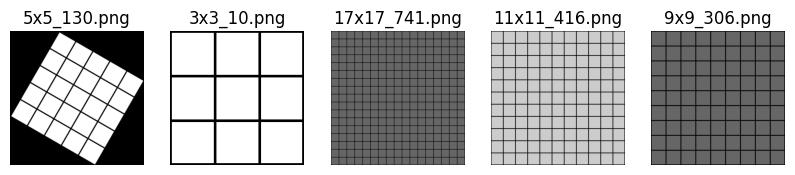

In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def display_images_from_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    
    # Chọn ngẫu nhiên 5 ảnh từ thư mục
    selected_images = random.sample(image_files, 5)
    
    plt.figure(figsize=(10, 10))
    
    for i, image_file in enumerate(selected_images):
        img_path = os.path.join(folder_path, image_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển đổi từ BGR sang RGB
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_file)
    
    plt.show()

# Thực hiện hiển thị ảnh
folder_name = "board_images"  # Đảm bảo rằng thư mục chứa ảnh đã tồn tại
display_images_from_folder(folder_name)


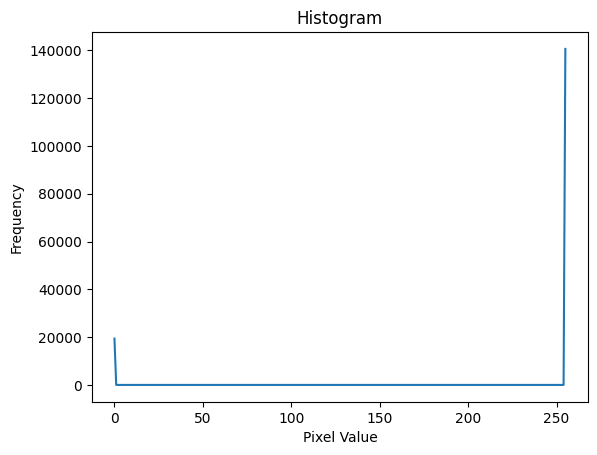

In [3]:
def plot_histogram(image):
    # Chuyển ảnh sang grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Tính histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Hiển thị histogram
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.plot(hist)
    plt.show()

# Ví dụ: Hiển thị histogram cho một bức ảnh
img = cv2.imread("board_images/8x8_252.png")
plot_histogram(img)


In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục chứa bộ dữ liệu ảnh
folder_path = 'board_images'

# Hàm kiểm tra độ sắc nét (sharpness) của ảnh
def check_sharpness(image):
    # Chuyển sang ảnh grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Tính toán gradient (sự thay đổi về độ sáng) trên ảnh
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

# Hàm kiểm tra sự biến dạng (ví dụ: kiểm tra độ sắc nét sau khi xoay)
def check_distortion(original_image, modified_image):
    original_sharpness = check_sharpness(original_image)
    modified_sharpness = check_sharpness(modified_image)
    sharpness_diff = abs(original_sharpness - modified_sharpness)
    return sharpness_diff

# Hàm thêm nhiễu vào ảnh
def add_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.uint8(np.clip(image + gauss, 0, 255))
    return noisy_image

# Hàm xoay ảnh
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

# Hàm kiểm tra ảnh trong thư mục
def check_images_in_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png') or f.endswith('.jpg')]
    
    sharpness_threshold = 100  # Ngưỡng độ sắc nét, có thể điều chỉnh

    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        
        # Đọc ảnh gốc
        image = cv2.imread(img_path)

        # Kiểm tra độ sắc nét của ảnh gốc
        sharpness = check_sharpness(image)
        print(f"Sharpness of {image_file}: {sharpness}")
        
        # Thêm nhiễu vào ảnh và kiểm tra
        noisy_image = add_noise(image)
        noisy_sharpness = check_sharpness(noisy_image)
        print(f"Sharpness of {image_file} after noise: {noisy_sharpness}")

        # Xoay ảnh và kiểm tra sự biến dạng
        rotated_image = rotate_image(image, 45)
        distortion = check_distortion(image, rotated_image)
        print(f"Distortion of {image_file} after rotation: {distortion}")

        # In ra kết quả kiểm tra
        if sharpness < sharpness_threshold:
            print(f"Warning: {image_file} has low sharpness!")

# Kiểm tra các ảnh trong thư mục
check_images_in_folder(folder_path)


Sharpness of 10x10_350.png: 10332.7638525756
Sharpness of 10x10_350.png after noise: 10749.420319778817
Distortion of 10x10_350.png after rotation: 3283.509168736
Sharpness of 10x10_351.png: 6378.90048
Sharpness of 10x10_351.png after noise: 10758.441583036016
Distortion of 10x10_351.png after rotation: 1852.6904789124019
Sharpness of 10x10_352.png: 9967.032
Sharpness of 10x10_352.png after noise: 10407.912855211454
Distortion of 10x10_352.png after rotation: 2917.326333840394
Sharpness of 10x10_353.png: 10428.502191168256
Sharpness of 10x10_353.png after noise: 11484.41150364
Distortion of 10x10_353.png after rotation: 3986.83388211712
Sharpness of 10x10_354.png: 9967.032
Sharpness of 10x10_354.png after noise: 10423.154832408063
Distortion of 10x10_354.png after rotation: 2788.0601032558225
Sharpness of 10x10_355.png: 3878.8659140463787
Sharpness of 10x10_355.png after noise: 5594.252278288791
Distortion of 10x10_355.png after rotation: 1287.8674635729703
Sharpness of 10x10_356.png: 

KeyboardInterrupt: 

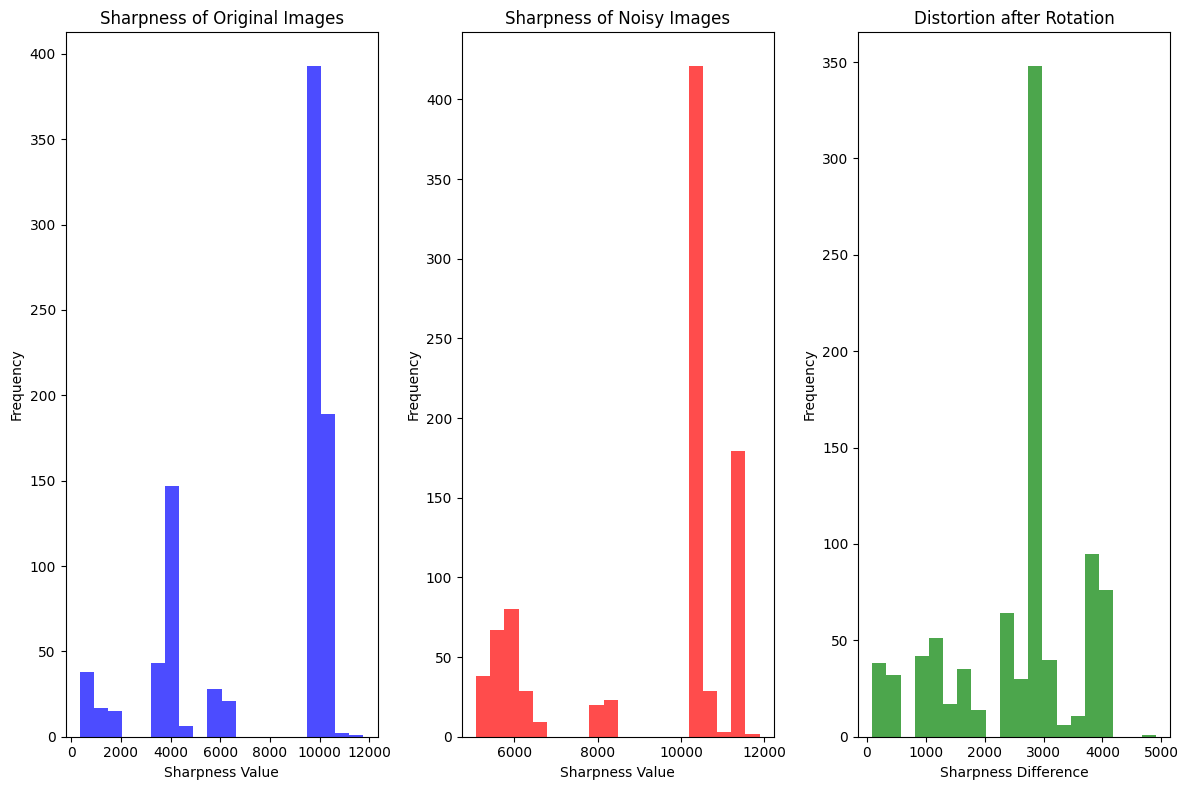

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục chứa bộ dữ liệu ảnh
folder_path = 'board_images'

# Hàm kiểm tra độ sắc nét (sharpness) của ảnh
def check_sharpness(image):
    # Chuyển sang ảnh grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Tính toán gradient (sự thay đổi về độ sáng) trên ảnh
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

# Hàm kiểm tra sự biến dạng (ví dụ: kiểm tra độ sắc nét sau khi xoay)
def check_distortion(original_image, modified_image):
    original_sharpness = check_sharpness(original_image)
    modified_sharpness = check_sharpness(modified_image)
    sharpness_diff = abs(original_sharpness - modified_sharpness)
    return sharpness_diff

# Hàm thêm nhiễu vào ảnh
def add_noise(image):
    row, col, ch = image.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = np.uint8(np.clip(image + gauss, 0, 255))
    return noisy_image

# Hàm xoay ảnh
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

# Hàm kiểm tra ảnh trong thư mục và vẽ biểu đồ
def check_images_in_folder_and_plot(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png') or f.endswith('.jpg')]
    
    sharpness_values = []  # Lưu trữ độ sắc nét ảnh gốc
    noisy_sharpness_values = []  # Lưu trữ độ sắc nét ảnh có nhiễu
    distortion_values = []  # Lưu trữ sự biến dạng

    sharpness_threshold = 100  # Ngưỡng độ sắc nét, có thể điều chỉnh

    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        
        # Đọc ảnh gốc
        image = cv2.imread(img_path)

        # Kiểm tra độ sắc nét của ảnh gốc
        sharpness = check_sharpness(image)
        sharpness_values.append(sharpness)
        
        # Thêm nhiễu vào ảnh và kiểm tra
        noisy_image = add_noise(image)
        noisy_sharpness = check_sharpness(noisy_image)
        noisy_sharpness_values.append(noisy_sharpness)

        # Xoay ảnh và kiểm tra sự biến dạng
        rotated_image = rotate_image(image, 45)
        distortion = check_distortion(image, rotated_image)
        distortion_values.append(distortion)

        # In ra kết quả kiểm tra
        if sharpness < sharpness_threshold:
            print(f"Warning: {image_file} has low sharpness!")

    # Vẽ biểu đồ độ sắc nét của ảnh gốc, ảnh có nhiễu và sự biến dạng
    plt.figure(figsize=(12, 8))

    # Biểu đồ độ sắc nét của ảnh gốc
    plt.subplot(1, 3, 1)
    plt.hist(sharpness_values, bins=20, color='blue', alpha=0.7)
    plt.title("Sharpness of Original Images")
    plt.xlabel("Sharpness Value")
    plt.ylabel("Frequency")

    # Biểu đồ độ sắc nét của ảnh có nhiễu
    plt.subplot(1, 3, 2)
    plt.hist(noisy_sharpness_values, bins=20, color='red', alpha=0.7)
    plt.title("Sharpness of Noisy Images")
    plt.xlabel("Sharpness Value")
    plt.ylabel("Frequency")

    # Biểu đồ sự biến dạng (sự khác biệt sắc nét)
    plt.subplot(1, 3, 3)
    plt.hist(distortion_values, bins=20, color='green', alpha=0.7)
    plt.title("Distortion after Rotation")
    plt.xlabel("Sharpness Difference")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Kiểm tra và vẽ biểu đồ cho các ảnh trong thư mục
check_images_in_folder_and_plot(folder_path)


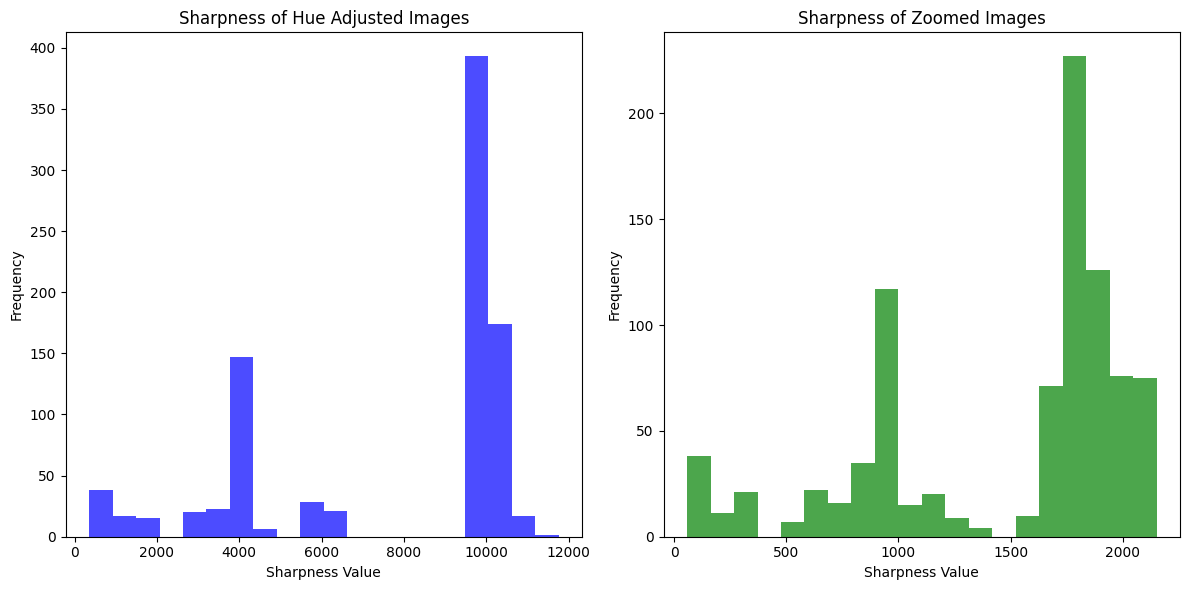

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Hàm điều chỉnh độ sắc nét (sắc thái màu)
def adjust_hue(image, factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:, :, 0] = np.clip(hsv[:, :, 0] + factor, 0, 255)
    adjusted_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return adjusted_image

# Hàm zoom vào ảnh (cắt và phóng to lại)
def zoom_in(image, zoom_factor=1.5):
    height, width, _ = image.shape
    crop_height = int(height / zoom_factor)
    crop_width = int(width / zoom_factor)
    start_y = (height - crop_height) // 2
    start_x = (width - crop_width) // 2
    cropped_image = image[start_y:start_y+crop_height, start_x:start_x+crop_width]
    zoomed_image = cv2.resize(cropped_image, (width, height))
    return zoomed_image

# Đường dẫn tới thư mục chứa bộ dữ liệu ảnh
folder_path = 'board_images'  # Thay đổi đường dẫn tới thư mục dữ liệu của bạn

# Hàm đọc toàn bộ bộ dữ liệu, thực hiện tăng cường và vẽ biểu đồ
def process_and_plot_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png') or f.endswith('.jpg')]
    
    hue_sharpness_values = []
    zoom_sharpness_values = []

    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)

        # Đọc ảnh và chuyển sang RGB (nếu ảnh được đọc ở định dạng BGR)
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Thực hiện điều chỉnh sắc thái màu và zoom vào ảnh
        hue_adjusted_image = adjust_hue(image_rgb, 20)  # Điều chỉnh sắc thái màu
        zoomed_image = zoom_in(image_rgb)  # Zoom vào ảnh

        # Tính độ sắc nét (sharpness) cho ảnh điều chỉnh và zoom
        hue_sharpness = check_sharpness(hue_adjusted_image)
        zoom_sharpness = check_sharpness(zoomed_image)

        hue_sharpness_values.append(hue_sharpness)
        zoom_sharpness_values.append(zoom_sharpness)

    # Vẽ biểu đồ sắc nét của ảnh sau khi điều chỉnh màu sắc và zoom
    plt.figure(figsize=(12, 6))

    # Biểu đồ độ sắc nét của ảnh sau khi điều chỉnh sắc thái màu
    plt.subplot(1, 2, 1)
    plt.hist(hue_sharpness_values, bins=20, color='blue', alpha=0.7)
    plt.title("Sharpness of Hue Adjusted Images")
    plt.xlabel("Sharpness Value")
    plt.ylabel("Frequency")

    # Biểu đồ độ sắc nét của ảnh sau khi zoom
    plt.subplot(1, 2, 2)
    plt.hist(zoom_sharpness_values, bins=20, color='green', alpha=0.7)
    plt.title("Sharpness of Zoomed Images")
    plt.xlabel("Sharpness Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Hàm kiểm tra độ sắc nét (sharpness)
def check_sharpness(image):
    # Chuyển sang ảnh grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Tính toán gradient (sự thay đổi về độ sáng) trên ảnh
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

# Gọi hàm để xử lý và vẽ biểu đồ
process_and_plot_images(folder_path)




In [12]:
# Ví dụ về việc thay đổi số lượng bins
plt.hist(hue_sharpness_values, bins=30, color='blue', alpha=0.7)  # Thử với 30 bins thay vì 20


NameError: name 'hue_sharpness_values' is not defined

In [8]:
import os

# Tạo thư mục để lưu ảnh
folder_name = "augmented_images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Lưu ảnh đã thay đổi
cv2.imwrite(os.path.join(folder_name, "original_image.png"), cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(folder_name, "noisy_image.png"), cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(folder_name, "rotated_image.png"), cv2.cvtColor(rotated_image, cv2.COLOR_RGB2BGR))


NameError: name 'image_rgb' is not defined

In [ ]:
# Hàm tạo histogram cho ảnh
def plot_histogram(image):
    # Chuyển ảnh sang grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Tính histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Hiển thị histogram
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.plot(hist)
    plt.show()

# Hiển thị histogram cho ảnh gốc và ảnh đã tăng cường
plot_histogram(image_rgb)
plot_histogram(noisy_image)


In [ ]:
import random
import shutil

def split_data(src_folder, train_folder, test_folder, val_folder, split_ratio=(0.7, 0.2, 0.1)):
    image_files = [f for f in os.listdir(src_folder) if f.endswith('.png')]
    
    # Tính toán số lượng ảnh cho mỗi tập
    random.shuffle(image_files)
    total_images = len(image_files)
    train_size = int(total_images * split_ratio[0])
    val_size = int(total_images * split_ratio[1])
    
    # Chia bộ dữ liệu
    train_images = image_files[:train_size]
    val_images = image_files[train_size:train_size + val_size]
    test_images = image_files[train_size + val_size:]
    
    # Di chuyển ảnh vào các thư mục tương ứng
    for image in train_images:
        shutil.move(os.path.join(src_folder, image), os.path.join(train_folder, image))
    for image in val_images:
        shutil.move(os.path.join(src_folder, image), os.path.join(val_folder, image))
    for image in test_images:
        shutil.move(os.path.join(src_folder, image), os.path.join(test_folder, image))

# Tạo các thư mục con cho train, test và validation
train_folder = "train"
val_folder = "validation"
test_folder = "test"

for folder in [train_folder, val_folder, test_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Chia bộ dữ liệu
split_data(folder_name, train_folder, test_folder, val_folder)


In [ ]:
# Ví dụ biểu đồ số lượng ảnh từ mỗi loại phép tăng cường
augmentation_types = ["Noisy", "Rotated", "Zoomed", "Hue Adjusted"]
augmented_counts = [50, 30, 20, 40]  # Số lượng ảnh từ mỗi loại

plt.figure(figsize=(8, 6))
plt.bar(augmentation_types, augmented_counts)
plt.title("Distribution of Augmented Images")
plt.xlabel("Augmentation Type")
plt.ylabel("Count")
plt.show()
